<a href="https://colab.research.google.com/github/alisharifi2000/ComplexNetwork_TMU/blob/main/ComplexNetworkProject_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import networkx as nx
import pandas as pd
import random
%matplotlib inline
from matplotlib import pyplot as plt
import collections
import operator

In [3]:
root = '/gdrive/My Drive/ComplexNetwork/'
G = nx.read_edgelist(root + 'p2p-Gnutella06.txt')
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8717
Number of edges: 31525
Average degree:   7.2330


# Counting Neighbors 

In [4]:
node_to_neighbors_mapping = [(node, len(list(G.neighbors(node)))) for node in G.nodes()]
node_to_neighbors_mapping[:5]

[('0', 12), ('1', 4), ('2', 5), ('3', 12), ('4', 6)]

In [5]:
node_to_neighbors_mapping.sort(key=operator.itemgetter(1))
node_to_neighbors_mapping[-10:]

[('173', 67),
 ('300', 67),
 ('558', 69),
 ('293', 69),
 ('299', 69),
 ('556', 70),
 ('31', 70),
 ('176', 72),
 ('356', 73),
 ('6494', 115)]

# Degree Centrality 

In [6]:
# degree_centrality = sorted(nx.degree_centrality(G).items(), key=lambda x : x[1], reverse=True)
# degree_centrality[:5]

# Betweenness Centrality

In [7]:
# betwenness_centrality = sorted(nx.betweenness_centrality(G).items(), key=lambda x : x[1], reverse=True)
# betwenness_centrality[:5]

# Closeness Centrality

In [8]:
# closeness_centrality = sorted(nx.closeness_centrality(G).items(), key=lambda x : x[1], reverse=True)
# closeness_centrality[:5]

# make dataframe by centrality

In [9]:
# df_degree = pd.DataFrame(degree_centrality, columns=['node', 'degree_c'])
# df_degree.set_index('node',inplace = True)
# df_between = pd.DataFrame(betwenness_centrality, columns=['node', 'between_c'])
# df_between.set_index('node',inplace = True)
# df_close = pd.DataFrame(closeness_centrality, columns=['node', 'close_c'])
# df_close.set_index('node',inplace = True)

In [10]:
# df_degree.head(5)

In [11]:
# df_between.head(5)

In [12]:
# df_close.head(5)

In [13]:
# result = pd.concat([df_degree, df_between,df_close], axis=1)
# result.head(5)

In [14]:
# # score 1 : (degree + between + close)/3
# result['score1'] = (result['degree_c'] + result['between_c'] + result['close_c'])/3
# # score 2 : (degree + 2 * between + close)/4
# result['score2'] = (result['degree_c'] + 2*result['between_c'] + result['close_c'])/4
# # score 3 : (degree + between + 2* close)/4
# result['score3'] = (result['degree_c'] + result['between_c'] + 2*result['close_c'])/4
# # score 4 : (2*degree + between +  close)/4
# result['score4'] = (2*result['degree_c'] + result['between_c'] + result['close_c'])/4
# result.head(5)

In [15]:
# result.to_csv('/gdrive/My Drive/ComplexNetwork/result.csv')

In [16]:
result = pd.read_csv('/gdrive/My Drive/ComplexNetwork/result.csv')
result.head()

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0           0          6494  0.013194  ...  0.096052  0.165518  0.091588
1           1           356  0.008375  ...  0.078583  0.148456  0.078472
2           2           176  0.008261  ...  0.076496  0.146364  0.077040
3           3           556  0.008031  ...  0.077316  0.147203  0.077517
4           4            31  0.008031  ...  0.076019  0.146069  0.076706

[5 rows x 9 columns]

In [17]:
result.sort_values('degree_c',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0           0          6494  0.013194  ...  0.096052  0.165518  0.091588
1           1           356  0.008375  ...  0.078583  0.148456  0.078472
2           2           176  0.008261  ...  0.076496  0.146364  0.077040
3           3           556  0.008031  ...  0.077316  0.147203  0.077517
4           4            31  0.008031  ...  0.076019  0.146069  0.076706

[5 rows x 9 columns]

In [18]:
result.sort_values('score4',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
20          20           172  0.007113  ...  0.077356  0.148528  0.077666

[5 rows x 9 columns]

In [19]:
result.sort_values('between_c',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
35          35           417  0.006310  ...  0.074304  0.140222  0.073612
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
48          48           452  0.005507  ...  0.075426  0.142970  0.074635

[5 rows x 9 columns]

In [20]:
result.sort_values('score2',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
14          14            99  0.007343  ...  0.077424  0.147608  0.077458

[5 rows x 9 columns]

In [21]:
result.sort_values('close_c',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
18          18           246  0.007228  ...  0.077050  0.147657  0.077312
1            1           356  0.008375  ...  0.078583  0.148456  0.078472

[5 rows x 9 columns]

In [22]:
result.sort_values('score3',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
1            1           356  0.008375  ...  0.078583  0.148456  0.078472

[5 rows x 9 columns]

# SI model

\begin{equation}
    \text{Coverage} = \frac{\text{infectected node in end}}{\text{total node number}}
\end{equation}


\begin{equation}
    \text{Speed} = \frac{\text{infectected node in end}}{\text{number of iteration}}
\end{equation}

\begin{equation}
    \text{Score1} = \frac{\text{degree centrality}+ \text{closeness centrality}+\text{betweenness centerality}}{3}
\end{equation}

\begin{equation}
    \text{Score2} = \frac{\text{degree centrality}+ \text{closeness centrality}+2*\text{betweenness centerality}}{4}
\end{equation}

\begin{equation}
    \text{Score3} = \frac{\text{degree centrality}+ 2*\text{closeness centrality}+\text{betweenness centerality}}{4}
\end{equation}

\begin{equation}
    \text{Score4} = \frac{2*\text{degree centrality}+ \text{closeness centrality}+\text{betweenness centerality}}{4}
\end{equation}

SI model for 50 iteration

| Condition | Coverage | Nodes per iteration(Speed) |
| --- | --- | --- |
| 5 nodes  , Degree Cenerality |0.5984857175633819  |104.34 |
| 10 nodes  , Degree Cenerality | 0.6037627624182632| 105.26 |
| --- | --- | --- |
| 5 nodes  , Betweenness Cenerality | 0.6030744522198004 | 105.14 |
| 10 nodes  , Betweenness Cenerality  |0.6143168521280257  |107.1  |
| --- | --- | --- |
| 5 nodes  , Closeness Cenetraliy | 0.604221635883905 | 105.34 |
| 10 nodes  , Closeness Cenetraliy |0.61041642767007  |106.42  |
| --- | --- | --- |
| 5 nodes  , Score 1 | 0.6159229092577722 | 107.38 |
| 10 nodes , Score 1 | 0.6125960766318688 | 106.8 |
| --- | --- | --- |
| 5 nodes  , Score 2 | 0.6075484685098084 | 105.92 |
| 10 nodes  , Score 2 | 0.6176436847539291 | 107.68 |
| --- | --- | --- |
| 5 nodes  , Score 3 |0.6035333256854423  |  105.22|
| 10 nodes  , Score 3 |0.6167259378226454  | 107.52 |
| --- | --- | --- |
| 5 nodes  , Score 4 |0.6081220603418608  | 106.02 |
| 10 nodes  , Score 4 | 0.6105311460364804 | 106.44 |


In [23]:
!pip install ndlib

import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

     |████████████████████████████████| 96 kB 5.3 MB/s 
     |████████████████████████████████| 3.2 MB 13.0 MB/s 


In [24]:
pos = nx.spring_layout(G)

## Degree Centerality

###  5 nodes with highest Cenerality Degree

In [25]:
result.sort_values('degree_c',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0           0          6494  0.013194  ...  0.096052  0.165518  0.091588
1           1           356  0.008375  ...  0.078583  0.148456  0.078472
2           2           176  0.008261  ...  0.076496  0.146364  0.077040
3           3           556  0.008031  ...  0.077316  0.147203  0.077517
4           4            31  0.008031  ...  0.076019  0.146069  0.076706

[5 rows x 9 columns]

In [26]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)

infected_nodes = [6494,356,176,556,31]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.81it/s]


In [27]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7860, 1: 857}
iteration :  20
{0: 6896, 1: 1821}
iteration :  30
{0: 5631, 1: 3086}
iteration :  40
{0: 4466, 1: 4251}
iteration :  50
{0: 3500, 1: 5217}


In [28]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5984857175633819
coverage speed network :  104.34


In [29]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [30]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5217

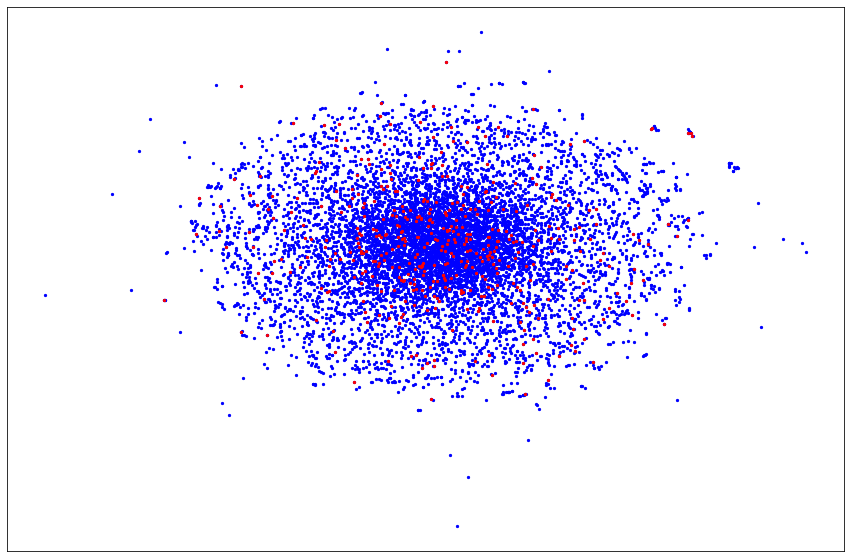

In [31]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

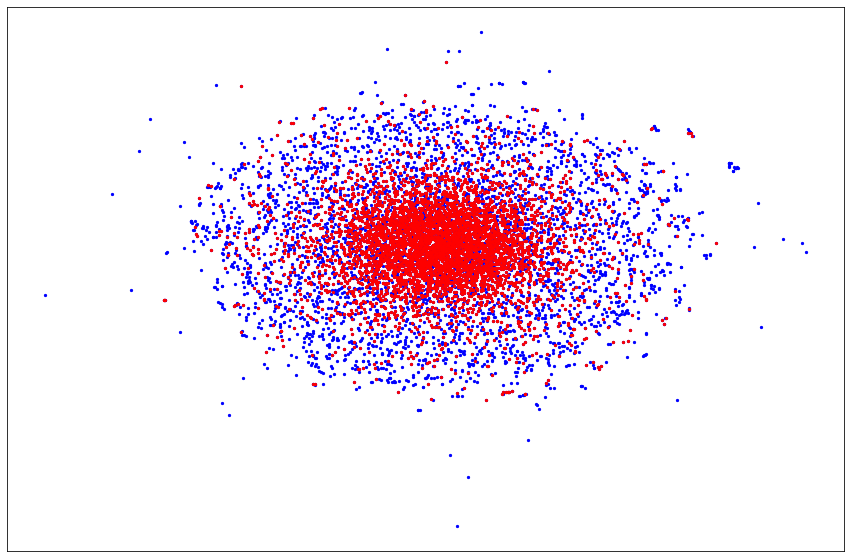

In [32]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

###  10 nodes with highest Cenerality Degree

In [33]:
result.sort_values('degree_c',ascending=False).head(10)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0           0          6494  0.013194  ...  0.096052  0.165518  0.091588
1           1           356  0.008375  ...  0.078583  0.148456  0.078472
2           2           176  0.008261  ...  0.076496  0.146364  0.077040
3           3           556  0.008031  ...  0.077316  0.147203  0.077517
4           4            31  0.008031  ...  0.076019  0.146069  0.076706
5           5           558  0.007916  ...  0.075327  0.144034  0.075759
6           6           293  0.007916  ...  0.077139  0.147598  0.077551
7           7           299  0.007916  ...  0.075662  0.145182  0.076254
8           8           173  0.007687  ...  0.076645  0.146303  0.076878
9           9           300  0.007687  ...  0.075352  0.144403  0.075814

[10 rows x 9 columns]

In [34]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)

infected_nodes = [6494,356,176,556,31,558,293,299,173,300]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.54it/s]


In [35]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7792, 1: 925}
iteration :  20
{0: 6899, 1: 1818}
iteration :  30
{0: 5642, 1: 3075}
iteration :  40
{0: 4385, 1: 4332}
iteration :  50
{0: 3454, 1: 5263}


In [36]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6037627624182632
coverage speed network :  105.26


In [37]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [38]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5263

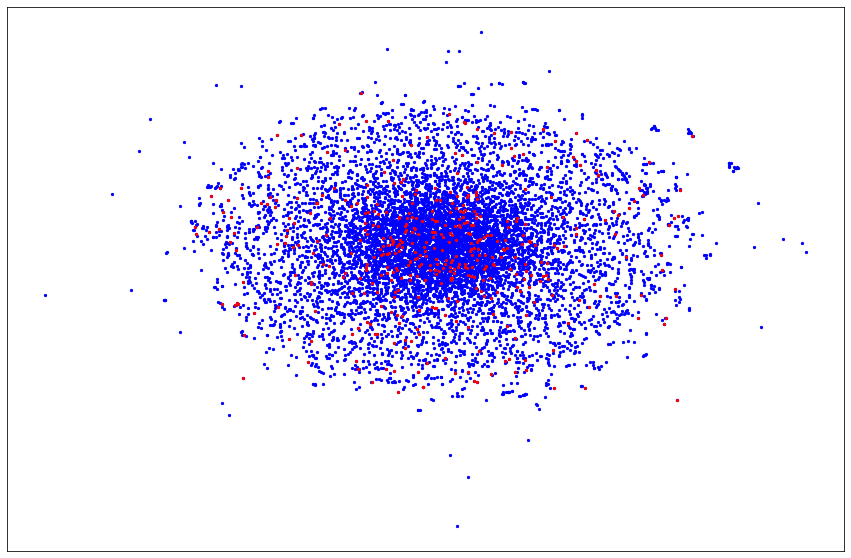

In [39]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

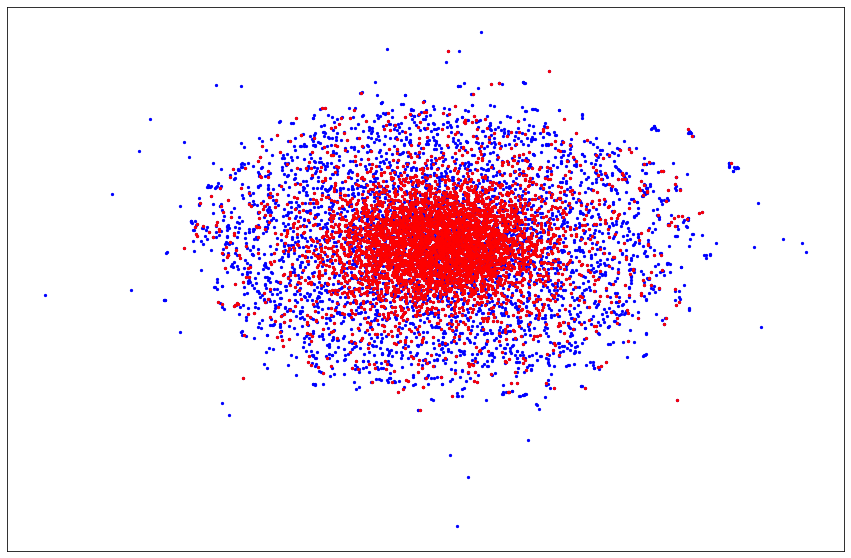

In [40]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Betweenness Centerality

###  5 nodes with highest Betweenness Degree

In [41]:
result.sort_values('between_c',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
35          35           417  0.006310  ...  0.074304  0.140222  0.073612
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
48          48           452  0.005507  ...  0.075426  0.142970  0.074635

[5 rows x 9 columns]

In [42]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,417,356,452]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.42it/s]


In [43]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7815, 1: 902}
iteration :  20
{0: 6926, 1: 1791}
iteration :  30
{0: 5700, 1: 3017}
iteration :  40
{0: 4423, 1: 4294}
iteration :  50
{0: 3460, 1: 5257}


In [44]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6030744522198004
coverage speed network :  105.14


In [45]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [46]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5257

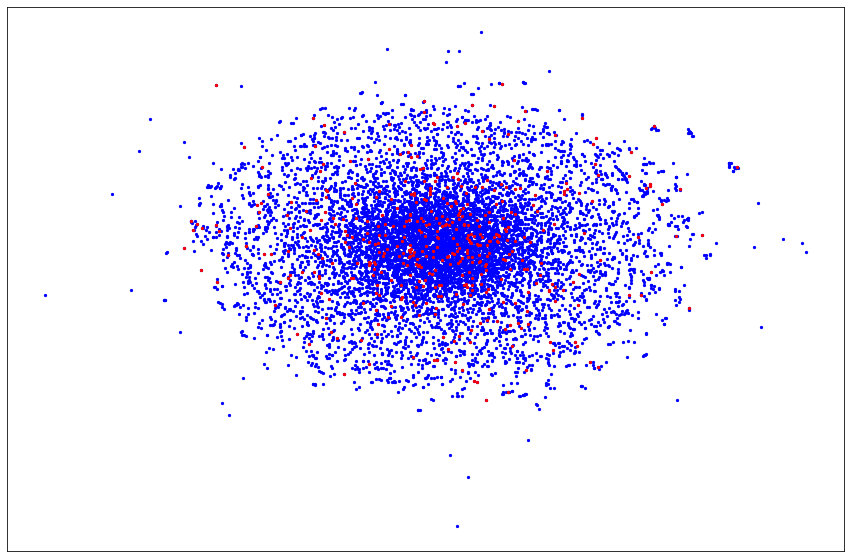

In [47]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

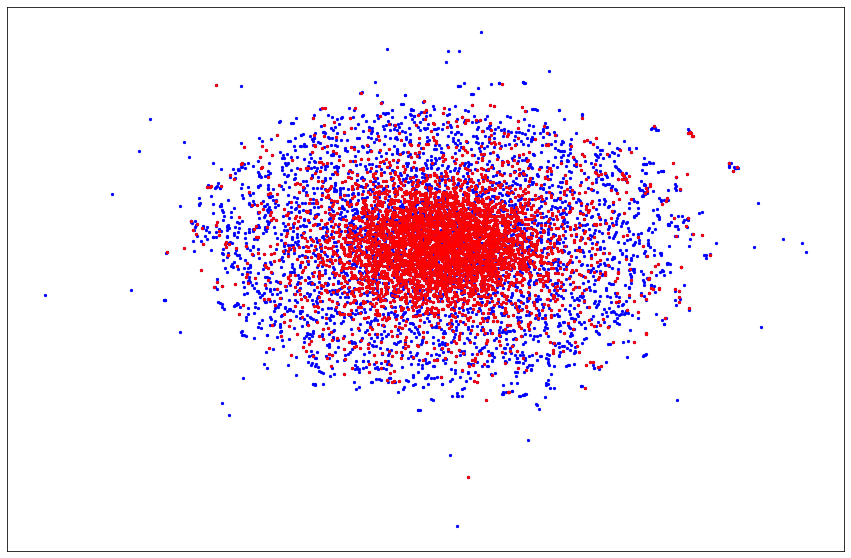

In [48]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

###  10 nodes with highest Betweenness Degree

In [49]:
result.sort_values('between_c',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
35          35           417  0.006310  ...  0.074304  0.140222  0.073612
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
48          48           452  0.005507  ...  0.075426  0.142970  0.074635

[5 rows x 9 columns]

In [50]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,417,356,452]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.71it/s]


In [51]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7789, 1: 928}
iteration :  20
{0: 6842, 1: 1875}
iteration :  30
{0: 5541, 1: 3176}
iteration :  40
{0: 4307, 1: 4410}
iteration :  50
{0: 3362, 1: 5355}


In [52]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6143168521280257
coverage speed network :  107.1


In [53]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [54]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5355

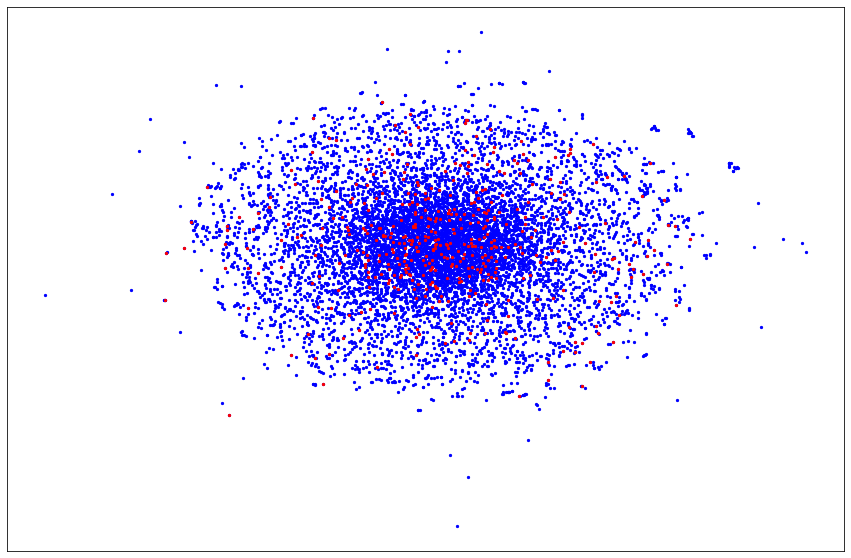

In [55]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

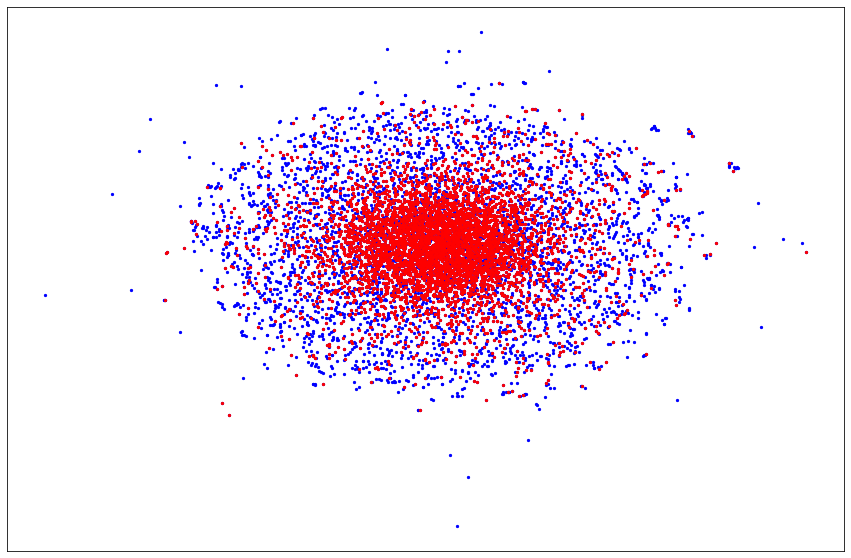

In [56]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Closeness Centerality

###  5 nodes with highest Closeness Degree

In [57]:
result.sort_values('close_c',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
18          18           246  0.007228  ...  0.077050  0.147657  0.077312
1            1           356  0.008375  ...  0.078583  0.148456  0.078472

[5 rows x 9 columns]

In [58]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)

infected_nodes = [6494,172,174,246,356]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.96it/s]


In [59]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7813, 1: 904}
iteration :  20
{0: 6878, 1: 1839}
iteration :  30
{0: 5627, 1: 3090}
iteration :  40
{0: 4392, 1: 4325}
iteration :  50
{0: 3450, 1: 5267}


In [60]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.604221635883905
coverage speed network :  105.34


In [61]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [62]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5267

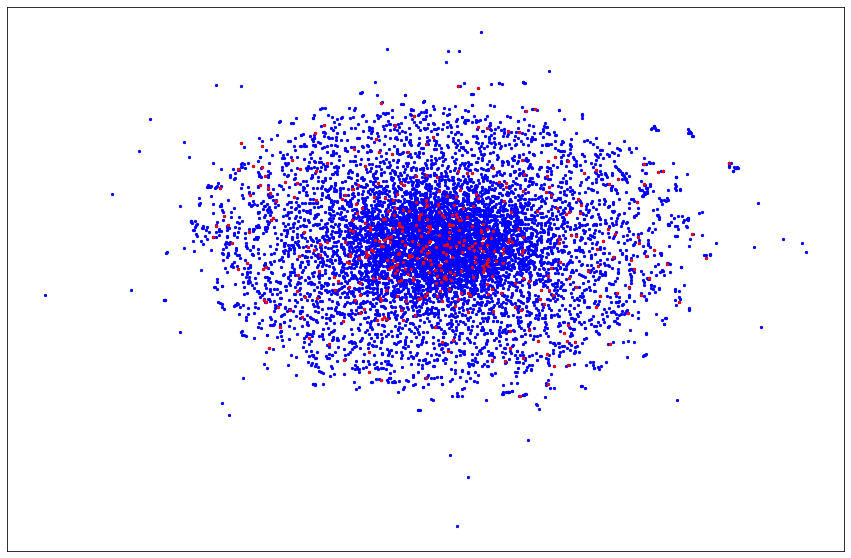

In [63]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

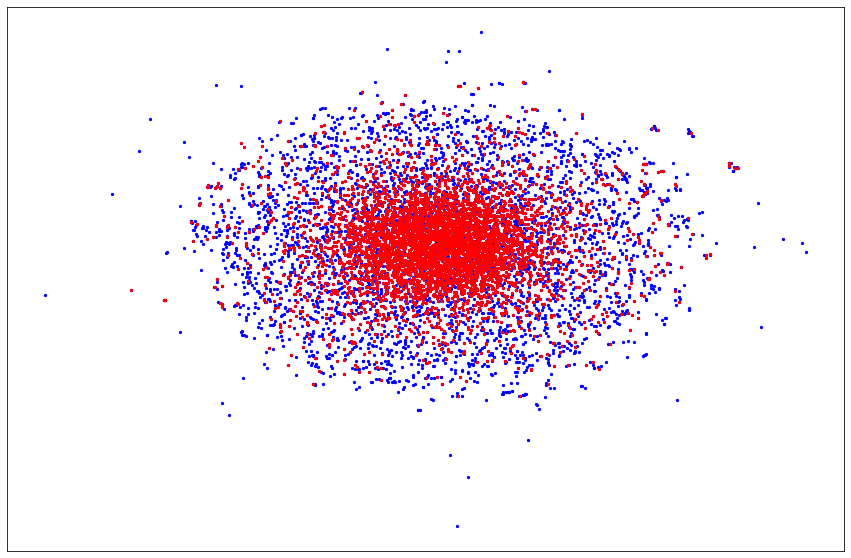

In [64]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

###  10 nodes with highest Closeness Degree

In [65]:
result.sort_values('close_c',ascending=False).head(10)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
18          18           246  0.007228  ...  0.077050  0.147657  0.077312
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
29          29           296  0.006540  ...  0.076189  0.147015  0.076582
6            6           293  0.007916  ...  0.077139  0.147598  0.077551
14          14            99  0.007343  ...  0.077424  0.147608  0.077458
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
22          22           563  0.007113  ...  0.076588  0.146866  0.076856

[10 rows x 9 columns]

In [66]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,172,174,246,356,296,293,99,6836,563]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.55it/s]


In [67]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7810, 1: 907}
iteration :  20
{0: 6911, 1: 1806}
iteration :  30
{0: 5620, 1: 3097}
iteration :  40
{0: 4362, 1: 4355}
iteration :  50
{0: 3396, 1: 5321}


In [68]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.61041642767007
coverage speed network :  106.42


In [69]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [70]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5321

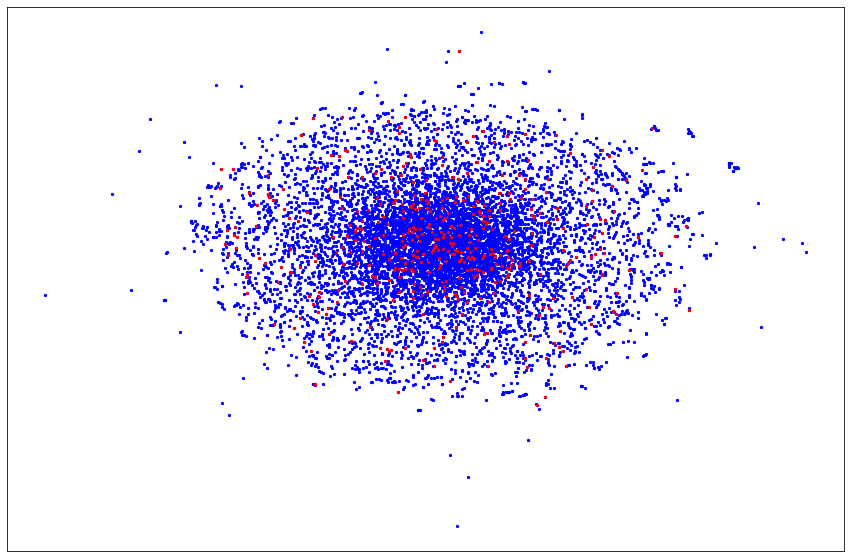

In [71]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

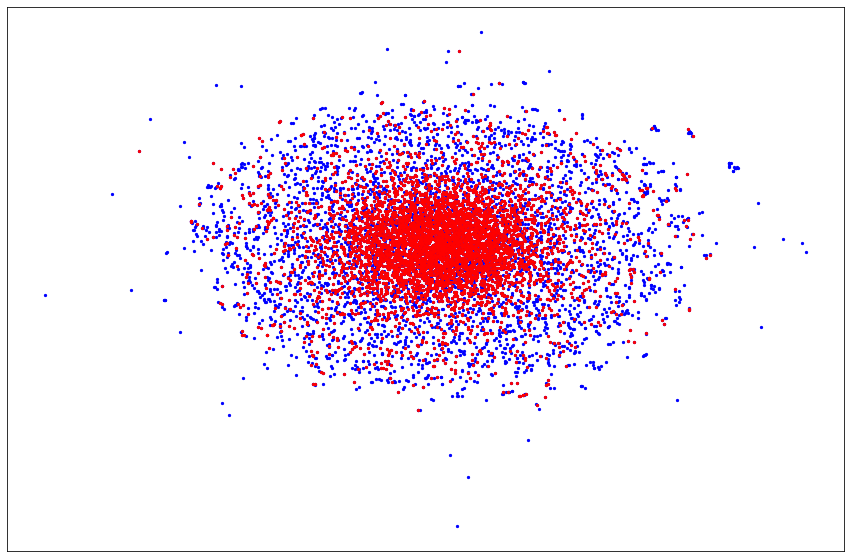

In [72]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score1

### 5 nodes with highest score1 is infected



In [73]:
result.sort_values('score1',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
20          20           172  0.007113  ...  0.077356  0.148528  0.077666

[5 rows x 9 columns]

In [74]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,356,174,172]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.60it/s]


In [75]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7870, 1: 847}
iteration :  20
{0: 6902, 1: 1815}
iteration :  30
{0: 5624, 1: 3093}
iteration :  40
{0: 4412, 1: 4305}
iteration :  50
{0: 3460, 1: 5257}


In [76]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6030744522198004
coverage speed network :  105.14


In [77]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [78]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5257

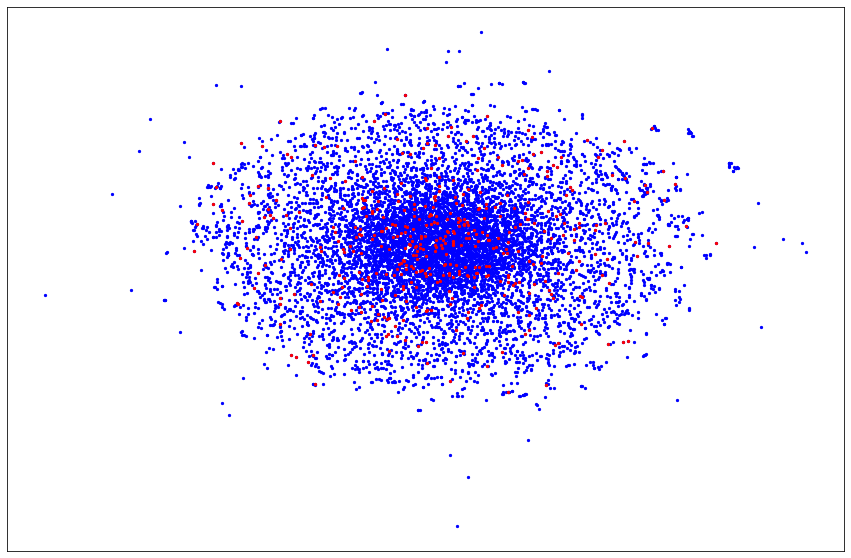

In [79]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

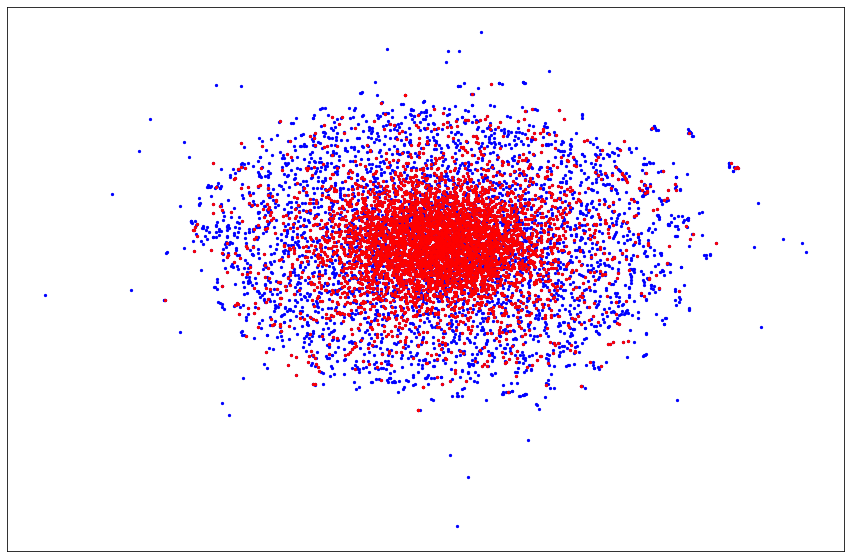

In [80]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

### 10 nodes with highest score1 is infected



In [81]:
result.sort_values('score1',ascending=False).head(10)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
14          14            99  0.007343  ...  0.077424  0.147608  0.077458
6            6           293  0.007916  ...  0.077139  0.147598  0.077551
3            3           556  0.008031  ...  0.077316  0.147203  0.077517
18          18           246  0.007228  ...  0.077050  0.147657  0.077312
12          12           297  0.007572  ...  0.076893  0.146627  0.077031

[10 rows x 9 columns]

In [82]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,356,174,172,99,293,556,246,297]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.59it/s]


In [83]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7857, 1: 860}
iteration :  20
{0: 6931, 1: 1786}
iteration :  30
{0: 5664, 1: 3053}
iteration :  40
{0: 4420, 1: 4297}
iteration :  50
{0: 3464, 1: 5253}


In [84]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6026155787541585
coverage speed network :  105.06


In [85]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [86]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5253

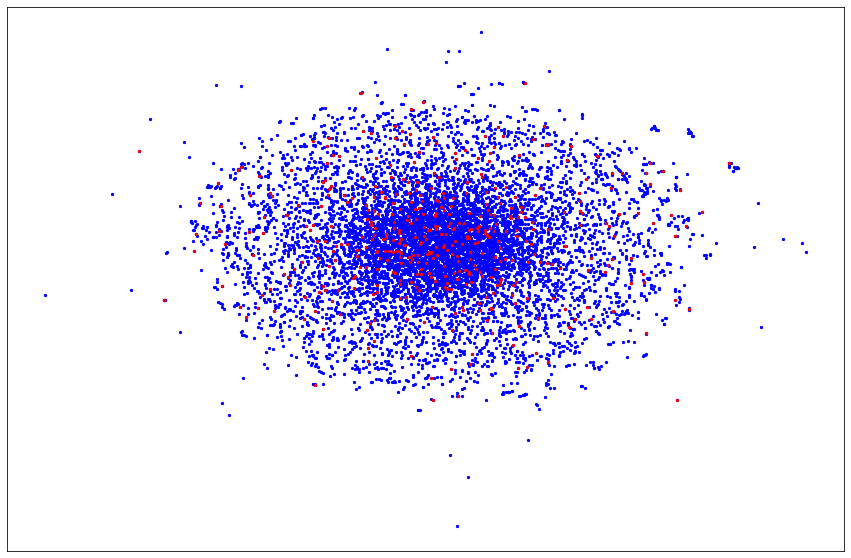

In [87]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

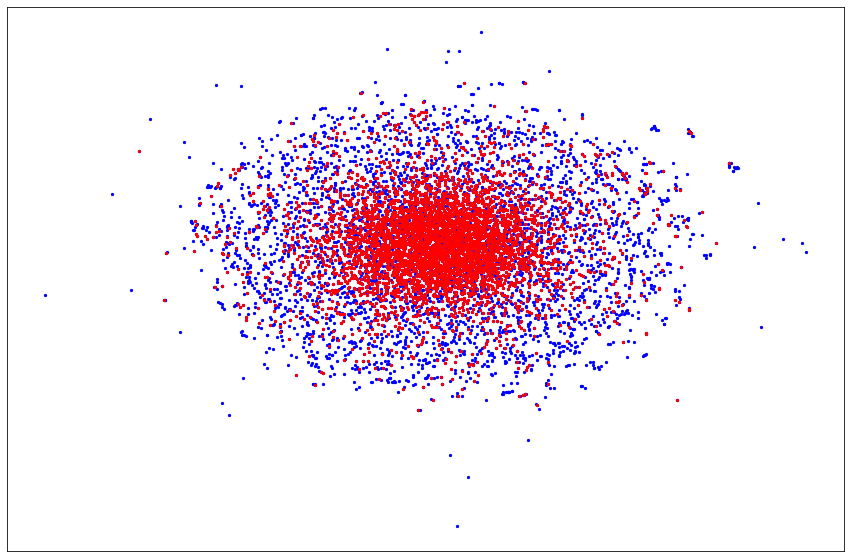

In [88]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score2

### 5 nodes with highest score2 is infected

In [89]:
result.sort_values('score2',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
14          14            99  0.007343  ...  0.077424  0.147608  0.077458

[5 rows x 9 columns]

In [90]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,356,174,99]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.16it/s]


In [91]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5975679706320982
coverage speed network :  104.18


In [92]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [93]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5209

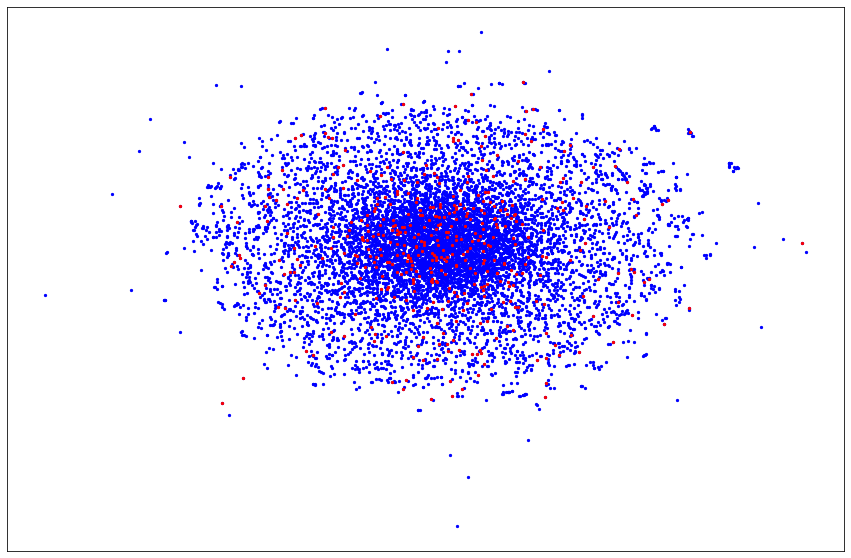

In [94]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

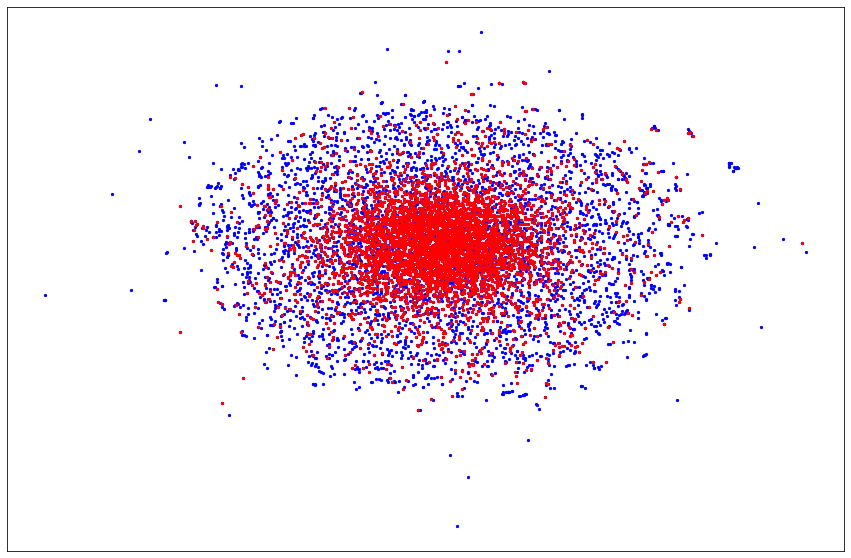

In [95]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

### 10 nodes with highest score2 is infected

In [96]:
result.sort_values('score2',ascending=False).head(10)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
14          14            99  0.007343  ...  0.077424  0.147608  0.077458
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
3            3           556  0.008031  ...  0.077316  0.147203  0.077517
6            6           293  0.007916  ...  0.077139  0.147598  0.077551
18          18           246  0.007228  ...  0.077050  0.147657  0.077312
12          12           297  0.007572  ...  0.076893  0.146627  0.077031

[10 rows x 9 columns]

In [97]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,356,174,99,172,556,293,246,297]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.41it/s]


In [98]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5986004359297924
coverage speed network :  104.36


In [99]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [100]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5218

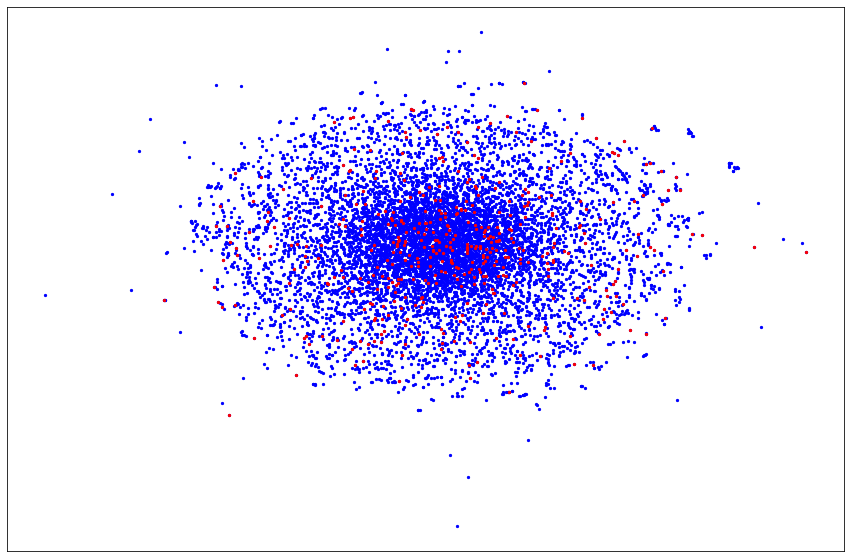

In [101]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

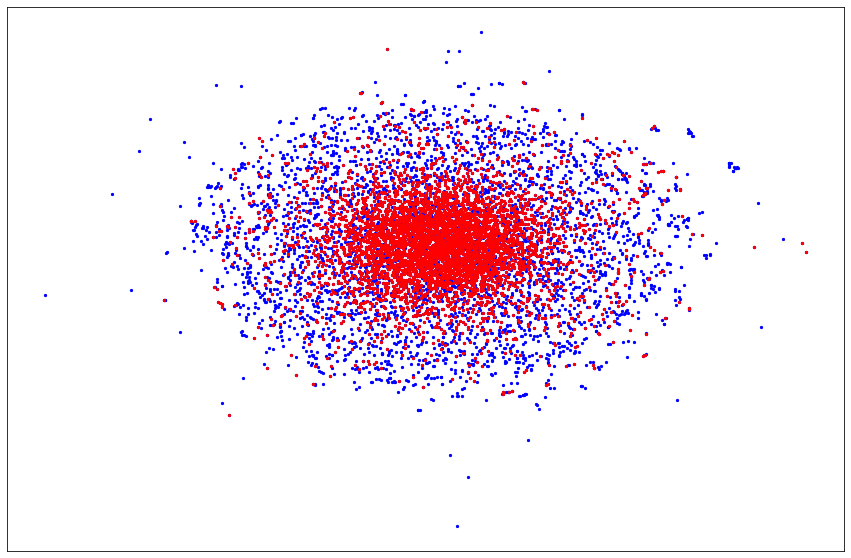

In [102]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score3

### 5 nodes with highest score3 is infected

In [103]:
result.sort_values('score3',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
1            1           356  0.008375  ...  0.078583  0.148456  0.078472

[5 rows x 9 columns]

In [104]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)

infected_nodes = [6494,6836,172,174,356]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.95it/s]


In [105]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.613628541929563
coverage speed network :  106.98


In [106]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [107]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5349

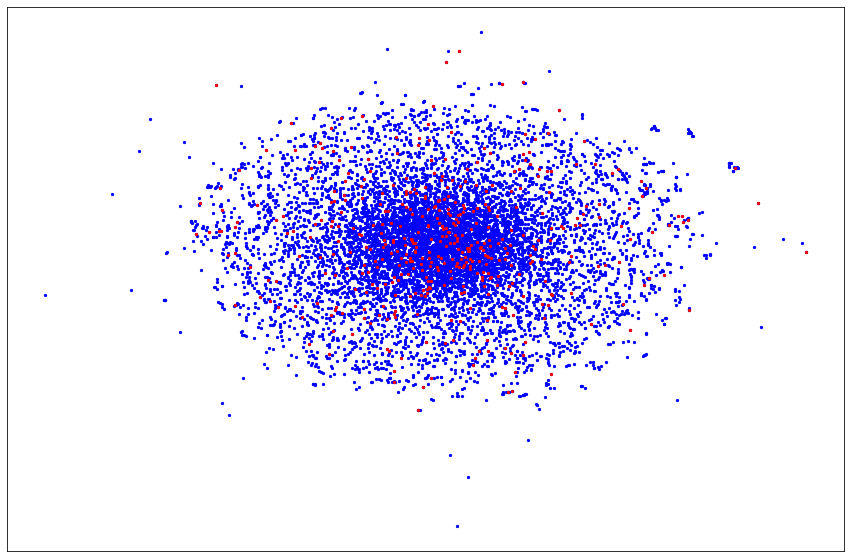

In [108]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

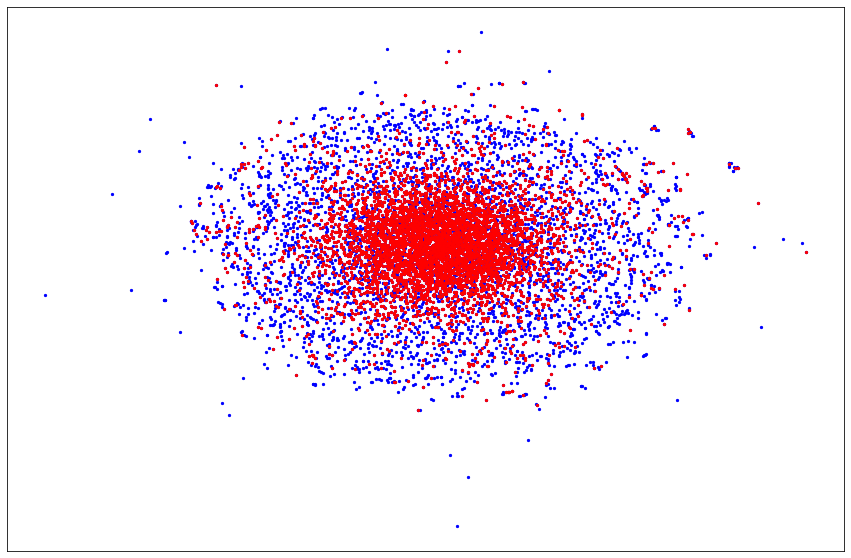

In [109]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

### 10 nodes with highest score3 is infected

In [110]:
result.sort_values('score3',ascending=False).head(10)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
18          18           246  0.007228  ...  0.077050  0.147657  0.077312
14          14            99  0.007343  ...  0.077424  0.147608  0.077458
6            6           293  0.007916  ...  0.077139  0.147598  0.077551
3            3           556  0.008031  ...  0.077316  0.147203  0.077517
29          29           296  0.006540  ...  0.076189  0.147015  0.076582

[10 rows x 9 columns]

In [111]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,172,174,356,246,99,293,556,296]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.13it/s]


In [112]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6211999541126534
coverage speed network :  108.3


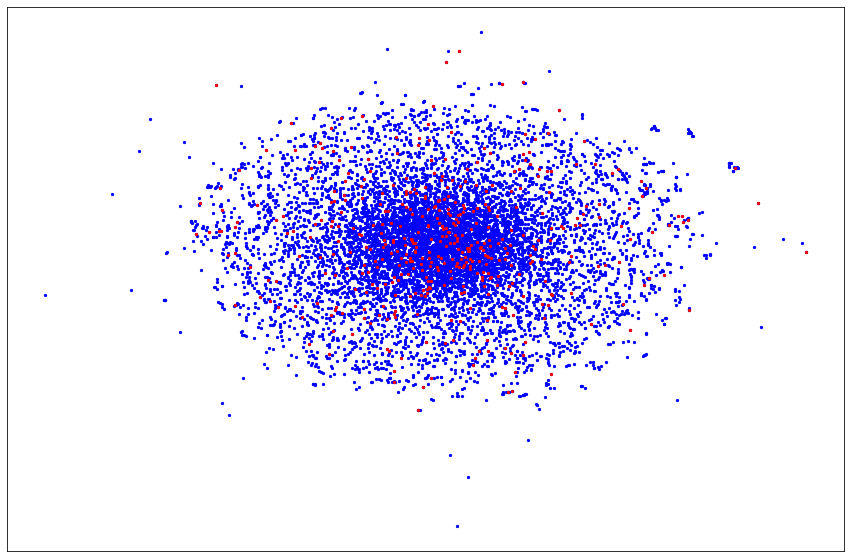

In [113]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

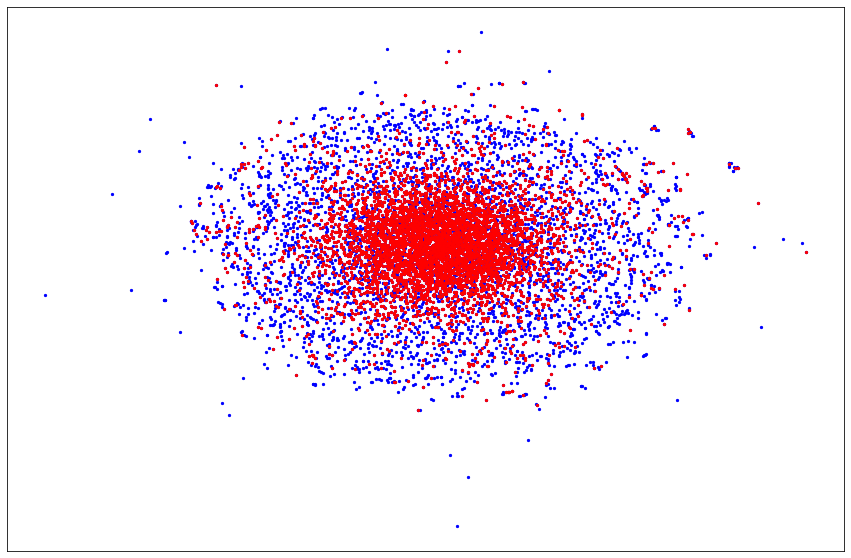

In [114]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score4

### 5 nodes with highest score4 is infected

In [115]:
result.sort_values('score4',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
20          20           172  0.007113  ...  0.077356  0.148528  0.077666

[5 rows x 9 columns]

In [116]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,356,174,172]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.25it/s]


In [117]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5925203625100378
coverage speed network :  103.3


In [118]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [119]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5165

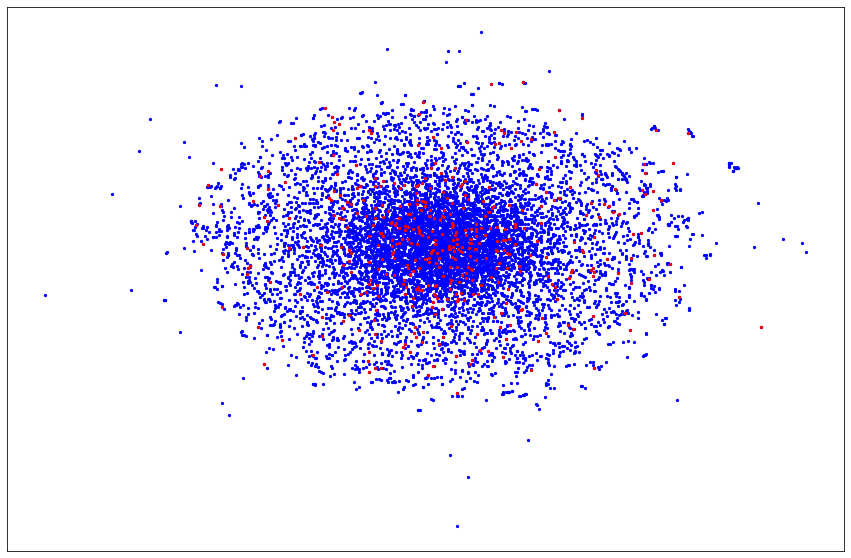

In [120]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

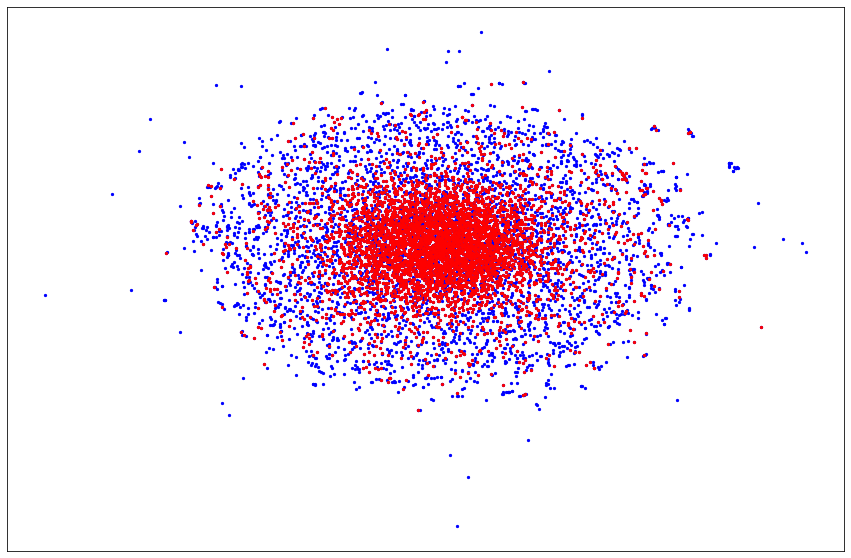

In [121]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

 ### 10 nodes with highest score4 is infected

In [122]:
result.sort_values('score4',ascending=False).head(10)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
6            6           293  0.007916  ...  0.077139  0.147598  0.077551
3            3           556  0.008031  ...  0.077316  0.147203  0.077517
14          14            99  0.007343  ...  0.077424  0.147608  0.077458
18          18           246  0.007228  ...  0.077050  0.147657  0.077312
2            2           176  0.008261  ...  0.076496  0.146364  0.077040

[10 rows x 9 columns]

In [123]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,356,174,172,293,556,99,246,176]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.37it/s]


In [124]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6099575542044281
coverage speed network :  106.34


In [125]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [126]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5317

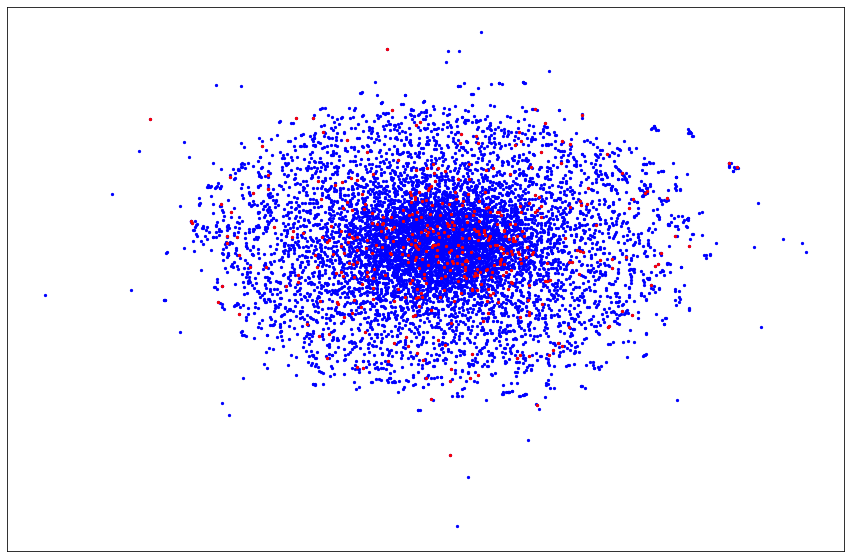

In [127]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

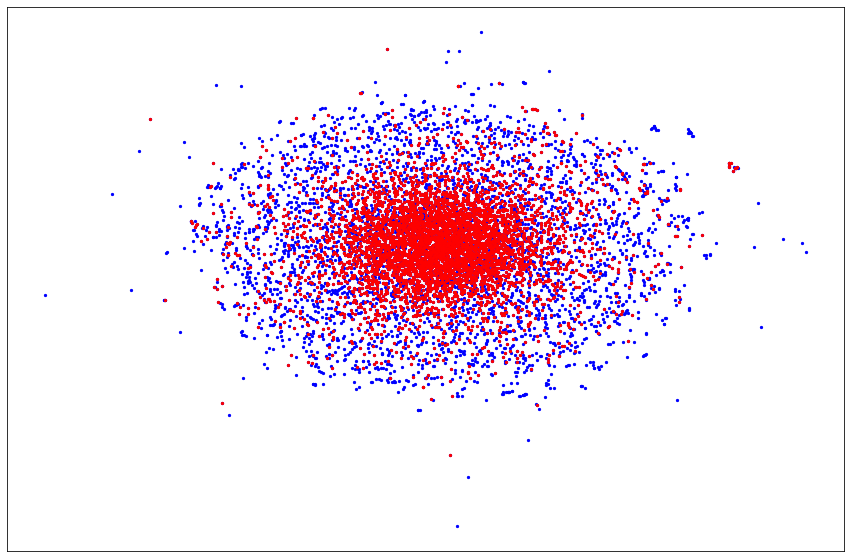

In [128]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

# SIS model

\begin{equation}
    \text{Coverage} = \frac{\text{infectected node in end}}{\text{total node number}}
\end{equation}


\begin{equation}
    \text{Speed} = \frac{\text{infectected node in end}}{\text{number of iteration}}
\end{equation}

\begin{equation}
    \text{Score1} = \frac{\text{degree centrality}+ \text{closeness centrality}+\text{betweenness centerality}}{3}
\end{equation}

\begin{equation}
    \text{Score2} = \frac{\text{degree centrality}+ \text{closeness centrality}+2*\text{betweenness centerality}}{4}
\end{equation}

\begin{equation}
    \text{Score3} = \frac{\text{degree centrality}+ 2*\text{closeness centrality}+\text{betweenness centerality}}{4}
\end{equation}

\begin{equation}
    \text{Score4} = \frac{2*\text{degree centrality}+ \text{closeness centrality}+\text{betweenness centerality}}{4}
\end{equation}

SIS model for 50 iteration

| Condition | Coverage | Speed |
| --- | --- | --- |
| 5 nodes  , score 1 | 0.5755420442812894 | 100.34 |
| 10 nodes , score 1 |0.5568429505563841 |  97.08|
| --- | --- | --- |
| 5 nodes  , score 2 |0.558793162785362  | 97.42 |
| 10 nodes  , score 2 |0.5517953424343237  |  96.2|
| --- | --- | --- |
| 5 nodes  , score 3 | 0.5573018240220259 | 97.16 |
| 10 nodes  , score 3 |0.5536308362968911  | 96.52 |
| --- | --- | --- |
| 5 nodes  , score 4 | 0.5415854078237926 |  94.42|
| 10 nodes  , score 4 |  0.5556957668922795| 96.88 |


## Score1

### 5 nodes with highest score1 is infected



In [129]:
result.sort_values('score1',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
20          20           172  0.007113  ...  0.077356  0.148528  0.077666

[5 rows x 9 columns]

In [130]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,356,174,172]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 21.79it/s]


In [131]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7893, 1: 824}
iteration :  20
{0: 7065, 1: 1652}
iteration :  30
{0: 5956, 1: 2761}
iteration :  40
{0: 4890, 1: 3827}
iteration :  50
{0: 3924, 1: 4793}


In [132]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5498451302053459
coverage speed network :  95.86


In [133]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [134]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5093

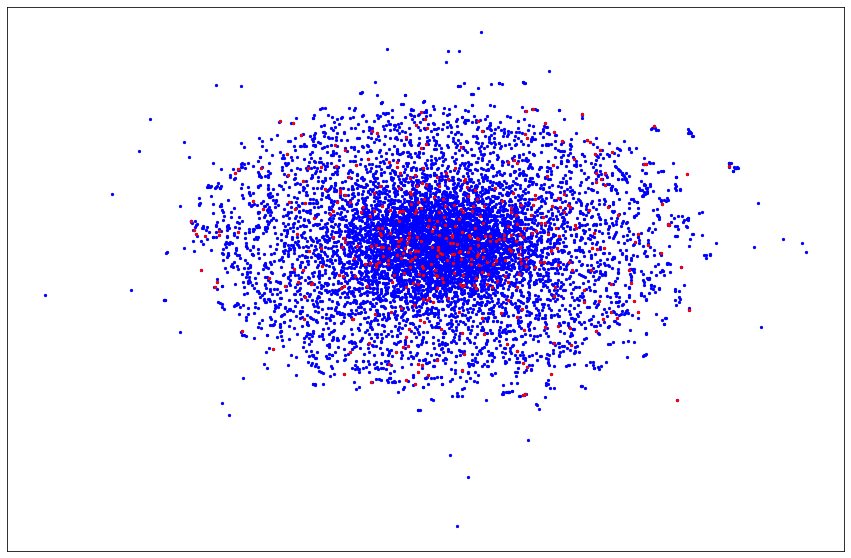

In [135]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

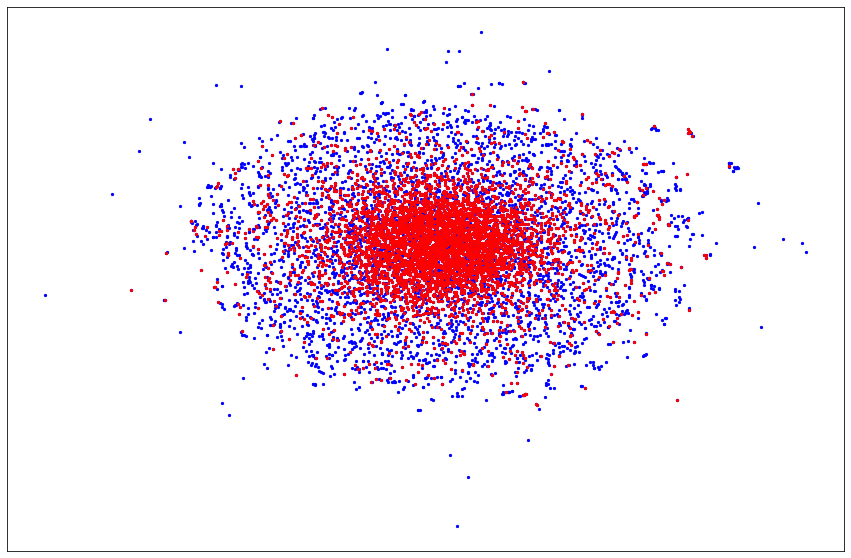

In [136]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

### 10 nodes with highest score1 is infected



In [137]:
result.sort_values('score1',ascending=False).head(10)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
14          14            99  0.007343  ...  0.077424  0.147608  0.077458
6            6           293  0.007916  ...  0.077139  0.147598  0.077551
3            3           556  0.008031  ...  0.077316  0.147203  0.077517
18          18           246  0.007228  ...  0.077050  0.147657  0.077312
12          12           297  0.007572  ...  0.076893  0.146627  0.077031

[10 rows x 9 columns]

In [138]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,356,174,172,99,293,556,246,297]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 21.86it/s]


In [139]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7804, 1: 913}
iteration :  20
{0: 7016, 1: 1701}
iteration :  30
{0: 5876, 1: 2841}
iteration :  40
{0: 4765, 1: 3952}
iteration :  50
{0: 3916, 1: 4801}


In [140]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5507628771366295
coverage speed network :  96.02


In [141]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [142]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5108

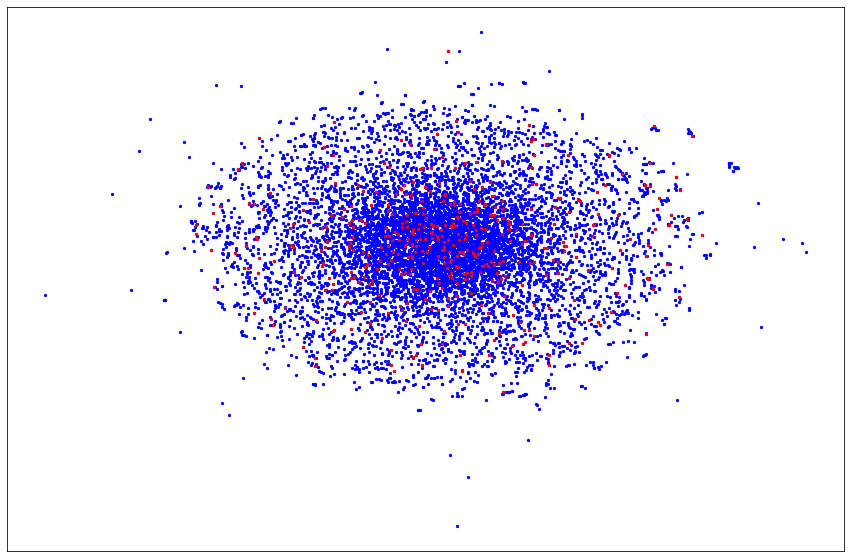

In [143]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

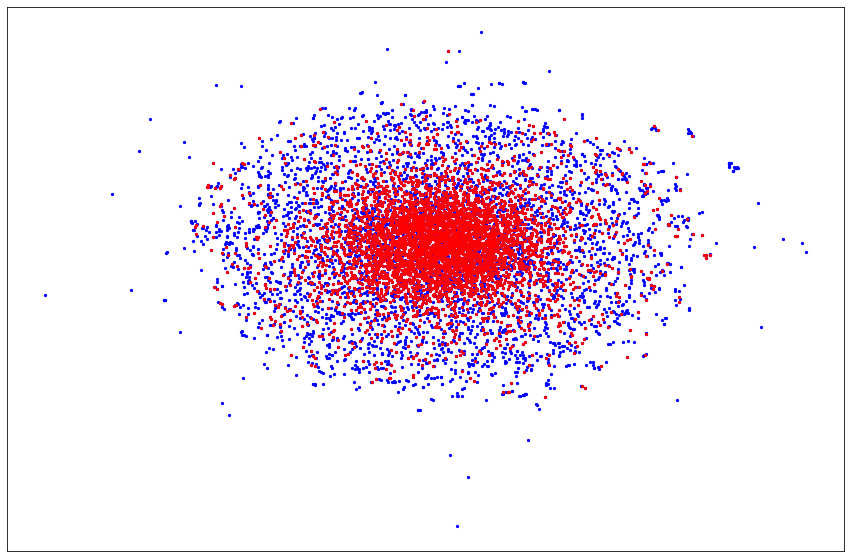

In [144]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score2

### 5 nodes with highest score2 is infected

In [145]:
result.sort_values('score2',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
14          14            99  0.007343  ...  0.077424  0.147608  0.077458

[5 rows x 9 columns]

In [146]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,356,174,99]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 21.22it/s]


In [147]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5592520362510038
coverage speed network :  97.5


In [148]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [149]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5180

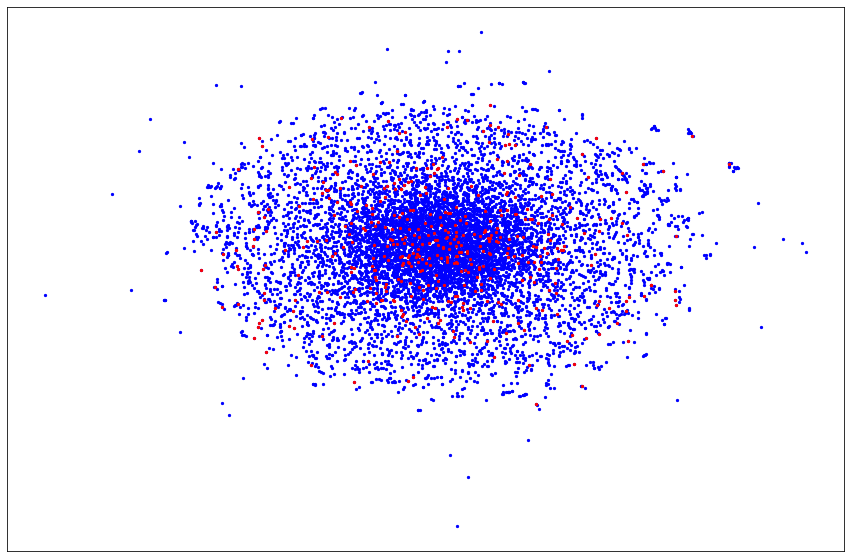

In [150]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

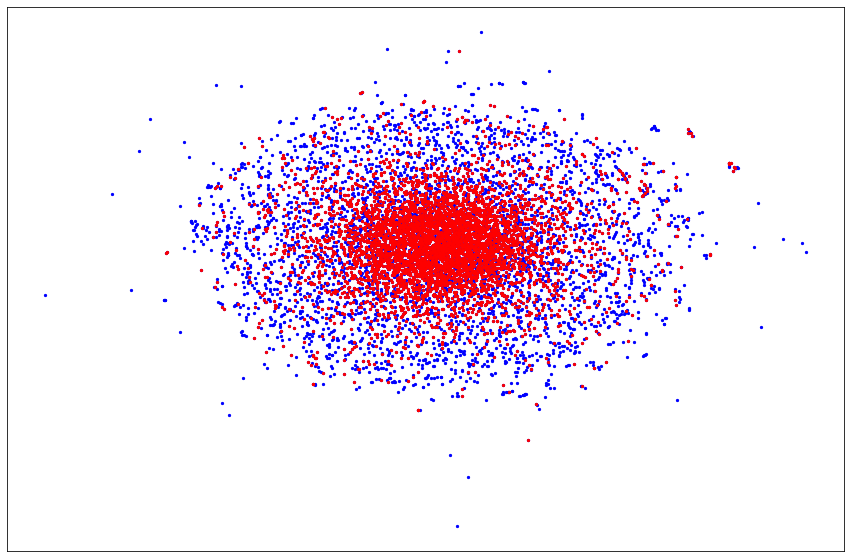

In [151]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

### 10 nodes with highest score2 is infected

In [152]:
result.sort_values('score2',ascending=False).head(10)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
14          14            99  0.007343  ...  0.077424  0.147608  0.077458
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
3            3           556  0.008031  ...  0.077316  0.147203  0.077517
6            6           293  0.007916  ...  0.077139  0.147598  0.077551
18          18           246  0.007228  ...  0.077050  0.147657  0.077312
12          12           297  0.007572  ...  0.076893  0.146627  0.077031

[10 rows x 9 columns]

In [153]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,356,174,99,172,556,293,246,297]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 21.76it/s]


In [154]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5552368934266376
coverage speed network :  96.8


In [155]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [156]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5147

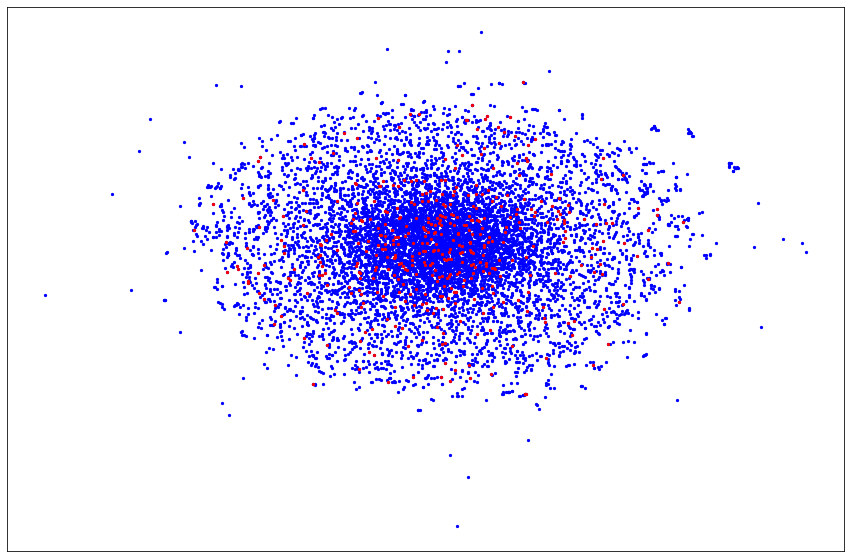

In [157]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

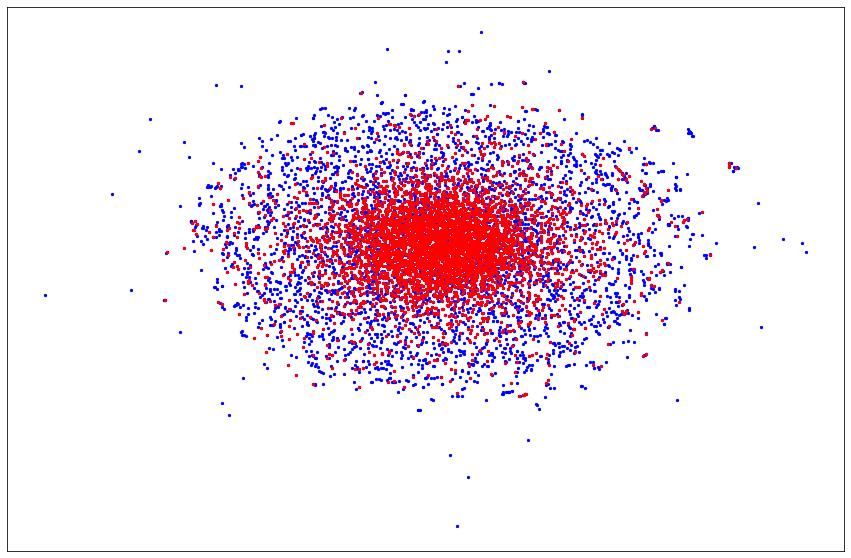

In [158]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score3

### 5 nodes with highest score3 is infected

In [159]:
result.sort_values('score3',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
1            1           356  0.008375  ...  0.078583  0.148456  0.078472

[5 rows x 9 columns]

In [160]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,172,174,356]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 21.81it/s]


In [161]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5579901342204887
coverage speed network :  97.28


In [162]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [163]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5154

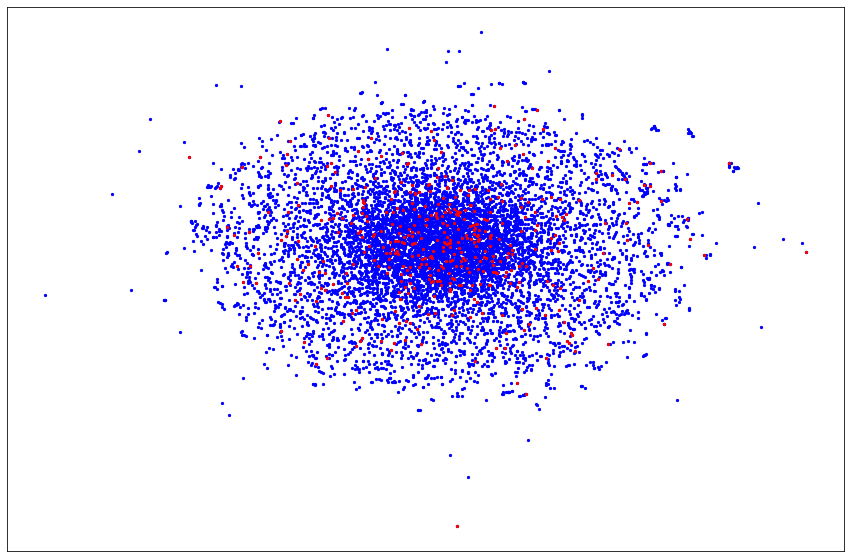

In [164]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

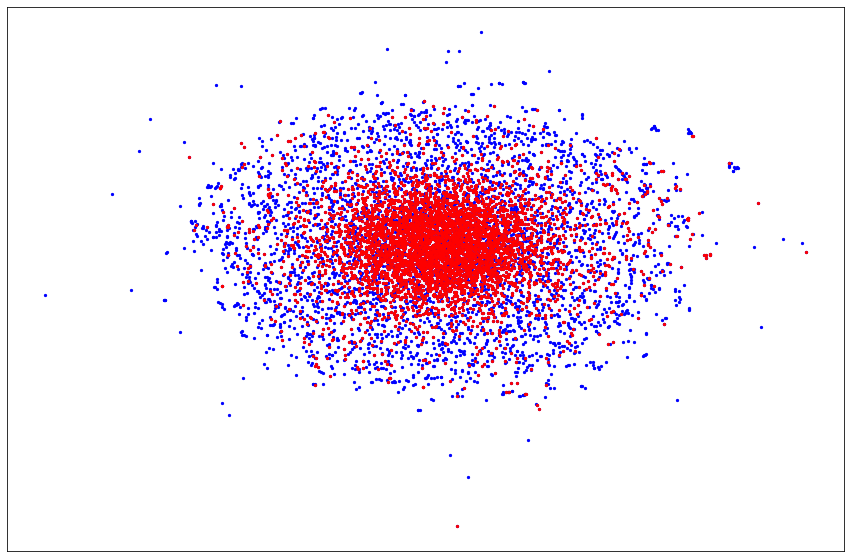

In [165]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

### 10 nodes with highest score3 is infected

In [166]:
result.sort_values('score3',ascending=False).head(10)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
18          18           246  0.007228  ...  0.077050  0.147657  0.077312
14          14            99  0.007343  ...  0.077424  0.147608  0.077458
6            6           293  0.007916  ...  0.077139  0.147598  0.077551
3            3           556  0.008031  ...  0.077316  0.147203  0.077517
29          29           296  0.006540  ...  0.076189  0.147015  0.076582

[10 rows x 9 columns]

In [167]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,172,174,356,246,99,293,556,296]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 21.35it/s]


In [168]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5601697831822875
coverage speed network :  97.66


In [169]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [170]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5141

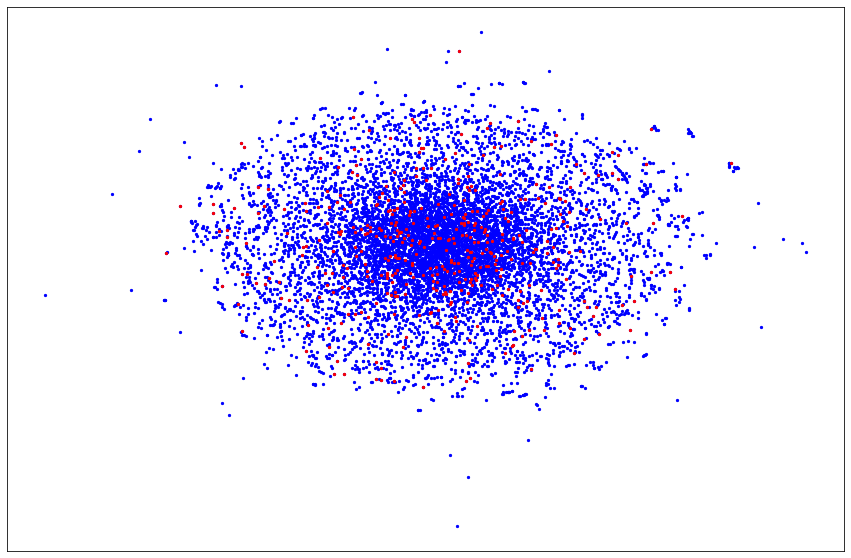

In [171]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

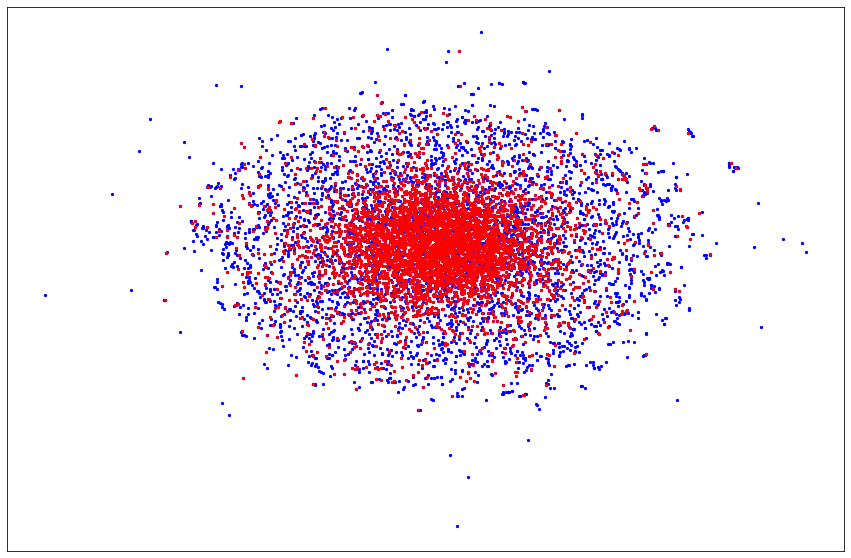

In [172]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score4

### 5 nodes with highest score4 is infected

In [173]:
result.sort_values('score4',ascending=False).head(5)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
20          20           172  0.007113  ...  0.077356  0.148528  0.077666

[5 rows x 9 columns]

In [174]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,356,174,172]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 21.73it/s]


In [175]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.573706550418722
coverage speed network :  100.02


In [176]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [177]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5291

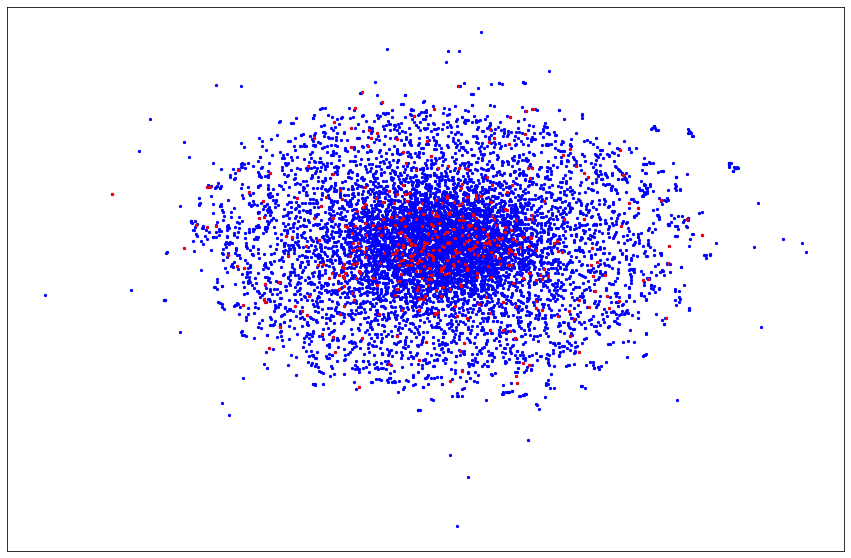

In [178]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

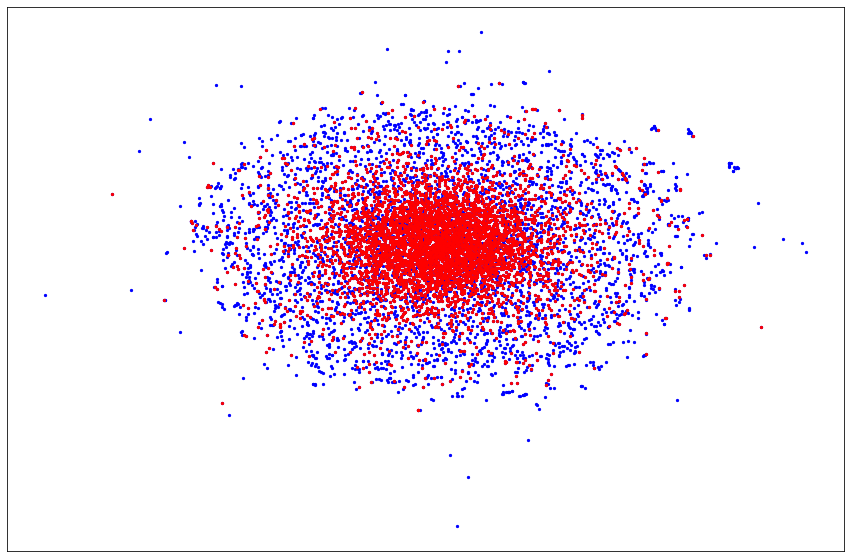

In [179]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

 ### 10 nodes with highest score4 is infected

In [180]:
result.sort_values('score4',ascending=False).head(10)

Unnamed: 0  Unnamed: 0.1  degree_c  ...    score2    score3    score4
0            0          6494  0.013194  ...  0.096052  0.165518  0.091588
16          16          6836  0.007343  ...  0.079533  0.148580  0.078485
1            1           356  0.008375  ...  0.078583  0.148456  0.078472
13          13           174  0.007572  ...  0.078077  0.148483  0.078044
20          20           172  0.007113  ...  0.077356  0.148528  0.077666
6            6           293  0.007916  ...  0.077139  0.147598  0.077551
3            3           556  0.008031  ...  0.077316  0.147203  0.077517
14          14            99  0.007343  ...  0.077424  0.147608  0.077458
18          18           246  0.007228  ...  0.077050  0.147657  0.077312
2            2           176  0.008261  ...  0.076496  0.146364  0.077040

[10 rows x 9 columns]

In [181]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)


infected_nodes = [6494,6836,356,174,172,293,556,99,246,176]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 22.00it/s]


In [182]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.557072387289205
coverage speed network :  97.12


In [183]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [184]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5187

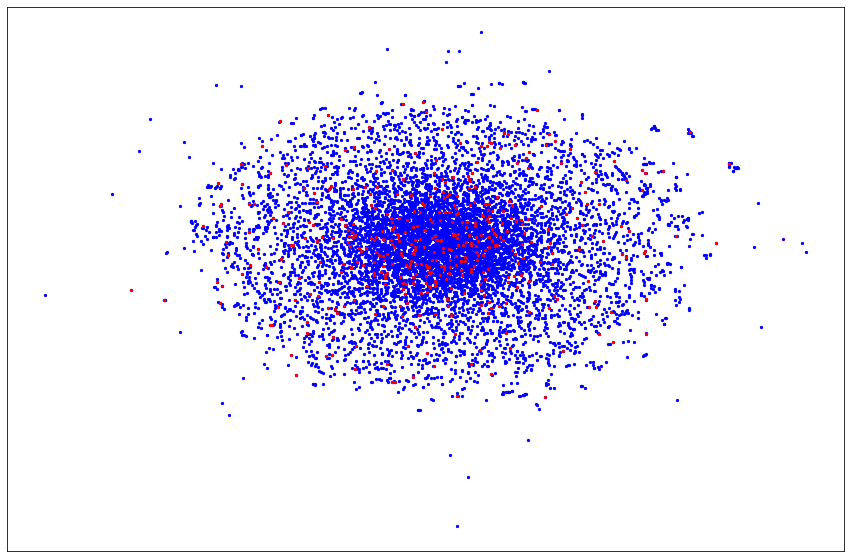

In [185]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

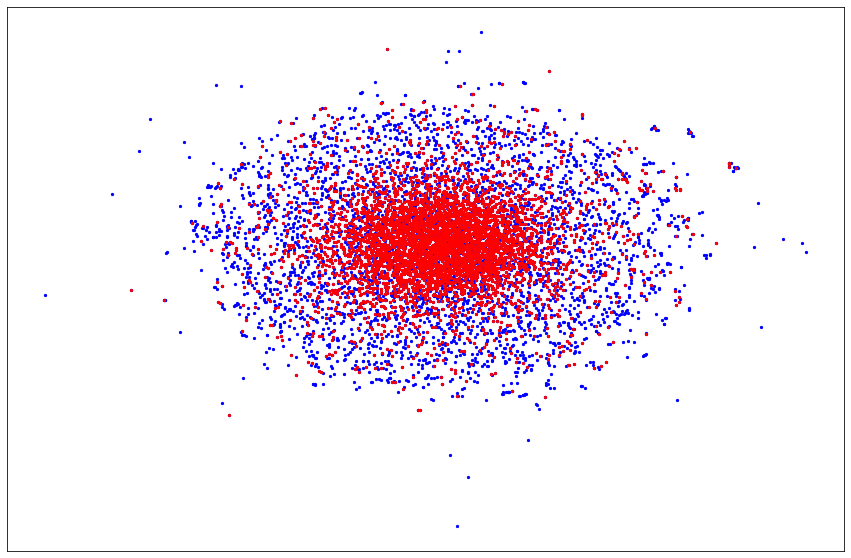

In [186]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)